##### DATA SET DESCRIPTION : 


This dataset contains an airline passenger satisfaction survey. 

#### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#### LOADING THE DATASET

In [2]:
df=pd.read_csv("airline_data.csv", index_col=0)
df = df.loc[:1999,:]


In [3]:
df = df.drop('satisfaction', axis = 1)

In [4]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,4,3,4,4,5,5,25,18.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,1,5,3,1,4,1,1,6.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [5]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [78]:
df.shape

(2000, 23)

In [79]:
#There are 2000 rows and 23 columns

In [80]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [81]:
#There are 4 categorical variables and 19 numerical variables

#### b Calculate five-point summary for numerical variables (1 MARK) 

In [82]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1997.000000
mean,65864.930500,39.41250,1210.085000,2.724500,3.063000,2.765500,2.968000,3.217500,3.231500,3.428500,3.315500,3.375500,3.293500,3.586500,3.319000,3.615500,3.273000,15.068000,15.609915
std,37402.978094,15.22433,1015.526506,1.316232,1.526498,1.401603,1.264427,1.342794,1.341569,1.330328,1.341588,1.264238,1.310808,1.164558,1.261362,1.198907,1.316943,35.951073,36.341422
min,54.000000,7.00000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33689.750000,27.00000,405.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,65635.000000,40.00000,861.500000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,98656.500000,51.00000,1749.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,13.000000,14.000000
max,129860.000000,80.00000,4243.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,412.000000,459.000000


#### VISUALIZATION

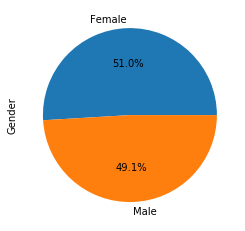

In [83]:
df['Gender'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

In [84]:
#there are lot of females than males

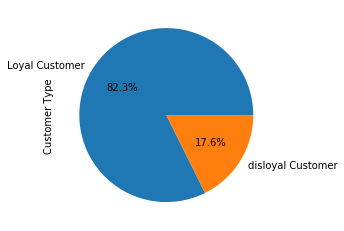

In [85]:
df['Customer Type'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

In [86]:
#The percentage of loyal customers is high

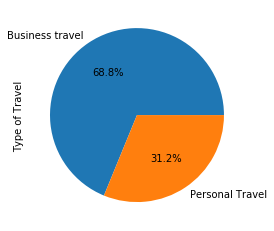

In [87]:
df['Type of Travel'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

In [88]:
#Many people travel for business reasons than personal reasons

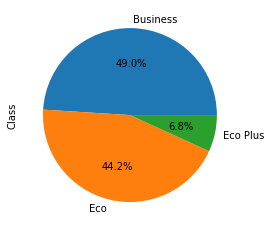

In [89]:
df['Class'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

Many people travel in businnes calss due to comfort, followed by Eco where the price is low and very few people travel in eco plus since there is no major price difference between eco plus and business 

#### COVARIANCE AND CORRELATION TABLES

In [90]:
#Correlation
df.corr()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,-0.006812,0.093438,-0.046370,-0.027875,-0.023055,-0.020891,0.048019,0.018493,0.048590,-0.001747,0.025314,0.035754,0.059578,0.034240,0.069160,0.035513,0.006383,-0.017293
Age,-0.006812,1.000000,0.084608,0.003003,0.056225,0.019281,0.000556,0.040096,0.191239,0.192916,0.056864,0.009830,0.031030,-0.091499,0.050298,-0.092082,0.070854,-0.046082,-0.041594
Flight Distance,0.093438,0.084608,1.000000,0.025885,-0.016738,0.041698,0.008014,0.058747,0.230008,0.152674,0.136771,0.110212,0.134281,0.061172,0.037435,0.054221,0.094056,-0.028693,-0.042441
Inflight wifi service,-0.046370,0.003003,0.025885,1.000000,0.314137,0.706864,0.331952,0.121662,0.434168,0.090879,0.203359,0.143068,0.210129,0.138102,-0.003987,0.118922,0.112385,0.038412,0.029891
Departure/Arrival time convenient,-0.027875,0.056225,-0.016738,0.314137,1.000000,0.448111,0.480264,0.010883,0.048814,0.026607,0.009587,0.059798,0.031256,0.041958,0.091662,0.061077,0.029513,0.005728,0.003808
Ease of Online booking,-0.023055,0.019281,0.041698,0.706864,0.448111,1.000000,0.503007,0.025519,0.366491,0.013405,0.048943,0.030521,0.149934,0.043235,-0.028972,0.040686,-0.000532,0.027062,0.019033
Gate location,-0.020891,0.000556,0.008014,0.331952,0.480264,0.503007,1.000000,-0.024478,-0.005363,-0.035561,0.002416,-0.013447,0.013215,0.042648,-0.056014,-0.012410,-0.005566,-0.004508,-0.005410
Food and drink,0.048019,0.040096,0.058747,0.121662,0.010883,0.025519,-0.024478,1.000000,0.240565,0.575090,0.612237,0.094786,0.031072,0.017874,0.056481,0.045758,0.633733,0.001124,-0.006253
Online boarding,0.018493,0.191239,0.230008,0.434168,0.048814,0.366491,-0.005363,0.240565,1.000000,0.423695,0.277365,0.152235,0.134870,0.073148,0.179827,0.084916,0.324936,-0.035301,-0.047111
Seat comfort,0.048590,0.192916,0.152674,0.090879,0.026607,0.013405,-0.035561,0.575090,0.423695,1.000000,0.585701,0.127065,0.099967,0.036930,0.175776,0.048777,0.692152,-0.027156,-0.033895


In [91]:
df.cov()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.398983e+09,-3879.081872,3.549122e+06,-2282.858577,-1591.548396,-1208.641619,-988.013231,2411.725979,927.976578,2417.773668,-87.661904,1196.986591,1752.964881,2595.092808,1615.387364,3101.308932,1749.280114,8582.724588,-23521.809522
Age,-3.879082e+03,231.780234,1.308100e+03,0.060174,1.306666,0.411437,0.010705,0.819691,3.905959,3.907197,1.161437,0.189201,0.619241,-1.622242,0.965895,-1.680734,1.420598,-25.222161,-23.025677
Flight Distance,3.549122e+06,1308.099987,1.031294e+06,34.599717,-25.946828,59.352109,10.289865,80.110568,313.363004,206.260708,186.339852,141.497831,178.749427,72.344320,47.952861,66.015190,125.790190,-1047.543052,-1566.930308
Inflight wifi service,-2.282859e+03,0.060174,3.459972e+01,1.732466,0.631172,1.304047,0.552460,0.215029,0.766662,0.159131,0.359100,0.238069,0.362541,0.211687,-0.006619,0.187664,0.194809,1.817643,1.429696
Departure/Arrival time convenient,-1.591548e+03,1.306666,-2.594683e+01,0.631172,2.330196,0.958753,0.926979,0.022309,0.099965,0.054032,0.019633,0.115401,0.062541,0.074588,0.176491,0.111779,0.059331,0.314373,0.211303
Ease of Online booking,-1.208642e+03,0.411437,5.935211e+01,1.304047,0.958753,1.964492,0.891442,0.048028,0.689131,0.024996,0.092031,0.054082,0.275463,0.070570,-0.051220,0.068369,-0.000982,1.363628,0.969574
Gate location,-9.880132e+02,0.010705,1.028986e+01,0.552460,0.926979,0.891442,1.598775,-0.041561,-0.009097,-0.059818,0.004098,-0.021495,0.021903,0.062799,-0.089337,-0.018813,-0.009269,-0.204926,-0.248565
Food and drink,2.411726e+03,0.819691,8.011057e+01,0.215029,0.022309,0.048028,-0.041561,1.803095,0.433365,1.027315,1.102930,0.160909,0.054691,0.027950,0.095665,0.073666,1.120683,0.054237,-0.305157
Online boarding,9.279766e+02,3.905959,3.133630e+02,0.766662,0.099965,0.689131,-0.009097,0.433365,1.799808,0.756180,0.499211,0.258201,0.237173,0.114282,0.304304,0.136580,0.574088,-1.702593,-2.297375
Seat comfort,2.417774e+03,3.907197,2.062607e+02,0.159131,0.054032,0.024996,-0.059818,1.027315,0.756180,1.769773,1.045331,0.213705,0.174322,0.057213,0.294956,0.077797,1.212626,-1.298787,-1.639212


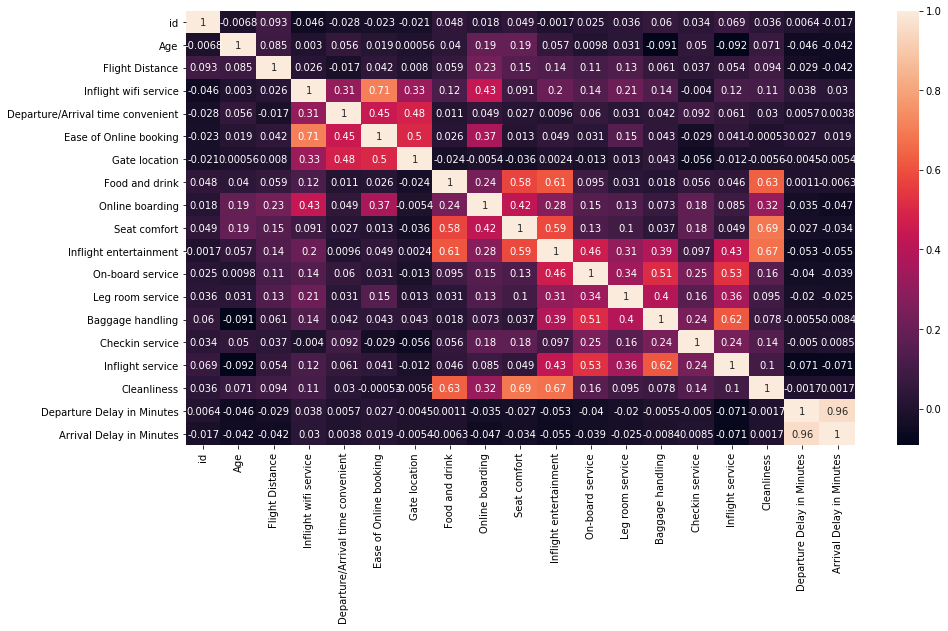

In [92]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

Very high correlation between departure delay and arrival delay since they are dependent on each other. Food and drnk and cleanliness also have high correlation

#### NULL VALUES

In [93]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             3
dtype: int64

In [94]:
#There are only three null values so dropping them
df = df.dropna()

In [95]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [96]:
#Droppimng id column due to unique values
df['id'].nunique()

1997

In [97]:
df = df.drop('id', axis = 1)

In [98]:
#Label Encoding the categorical columns
le = LabelEncoder()
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Class'] = le.fit_transform(df['Class'])

In [99]:
df['Class'].value_counts()

0    979
1    882
2    136
Name: Class, dtype: int64

#### SCALING

In [100]:
#Scaling the data
sc = StandardScaler()
x_scaled = sc.fit_transform(df)
x_scaled_df = pd.DataFrame(x_scaled)

### CLUSTERING

In [101]:
#Elbow plot
cluster_range = range(1, 15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5, random_state = 8)
    clusters.fit(x_scaled_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,43934.000000
1,2,38294.053756
2,3,35725.826257
3,4,33344.152219
4,5,31375.863652
5,6,29746.987991
6,7,28383.370020
7,8,27511.758343
8,9,26805.534029
9,10,26208.936035


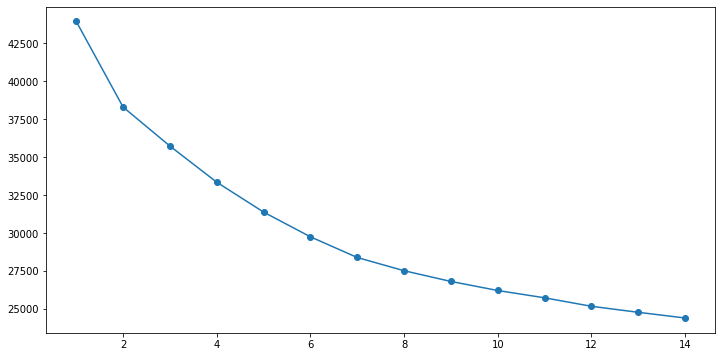

In [102]:
#Elbow plot
plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o')
plt.show()

In [103]:
#the bend is at 2. So the optimum value of k can be taken 

#### KMEANS FOR PCA

In [104]:
#fitting kmeans based on elbow plot
kmeans = KMeans(n_clusters=2)
m1 = kmeans.fit(x_scaled_df)
clusters = m1.predict(x_scaled_df)
df_k = df.copy(deep = True)
df_k['label'] = clusters
df_k.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,label
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,1
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,1
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,0


In [105]:
df_centers = pd.DataFrame(m1.cluster_centers_)
df_centers

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.018574,-0.101455,0.129057,-0.261543,-0.343222,0.235900,0.287313,0.062631,0.1683,0.040954,...,0.544067,0.700133,0.414801,0.346647,0.381099,0.242794,0.407947,0.557243,-0.070348,-0.072916
1,-0.020307,0.110919,-0.141097,0.285943,0.375242,-0.257908,-0.314117,-0.068474,-0.1840,-0.044775,...,-0.594824,-0.765449,-0.453499,-0.378986,-0.416653,-0.265444,-0.446005,-0.609229,0.076911,0.079719


In [106]:
m1.inertia_

38294.05375646139

In [107]:
df_k['label'].value_counts()

0    1043
1     954
Name: label, dtype: int64

### APPLYING PCA

In [108]:
#PCA
model = PCA(n_components = 12)
pca_val22 = model.fit_transform(x_scaled_df)
pca_val22.shape

(1997, 12)

In [109]:
eigen_vals = model.explained_variance_


In [110]:
tot = sum(eigen_vals)
var_exp = [(i/tot)*100 for i in sorted(eigen_vals, reverse = True)]
cum_var = np.cumsum(var_exp)
print('Cumulative variance', cum_var)

Cumulative variance [ 21.32557512  34.19979756  46.19524753  56.60633843  66.02023249
  73.79705182  79.37025729  84.36416502  89.3128545   93.72858872
  97.36868875 100.        ]


### KMEANS AFTER PCA

#### PCA WITH ALL THE VALUES

In [111]:
#Kmeans for pca eith all the values
kmeans = KMeans(n_clusters = 2)
m1 = kmeans.fit(pca_val22)
clusters = m1.predict(pca_val22)


In [112]:
clust_pca = pd.DataFrame(m1.cluster_centers_)
clust_pca

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.598065,0.116891,0.032564,0.002763,0.006724,0.024132,-0.025481,0.020882,-0.005530,0.031561,0.014038,-0.017038
1,1.754178,-0.128310,-0.035745,-0.003033,-0.007380,-0.026489,0.027970,-0.022922,0.006071,-0.034645,-0.015410,0.018702


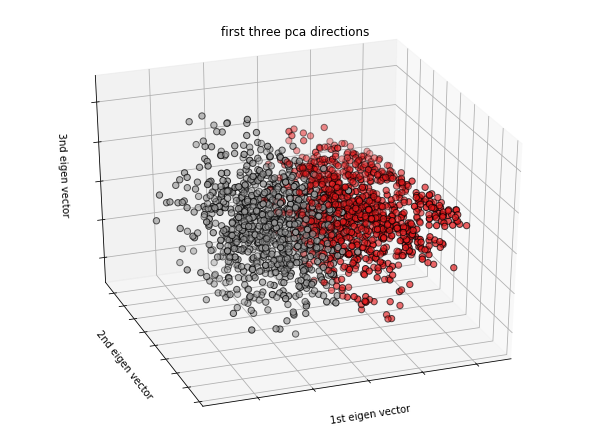

In [113]:
#3d plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev = -150, azim = 110)
x_reduced = PCA(n_components=3).fit_transform(x_scaled_df)
ax.scatter(x_reduced[:,0], x_reduced[:,1], x_reduced[:,2], c = m1.labels_, cmap = plt.cm.Set1, edgecolor = 'k', s = 40)
ax.set_title('first three pca directions')
ax.set_xlabel('1st eigen vector')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('2nd eigen vector')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('3nd eigen vector')
ax.w_zaxis.set_ticklabels([])
plt.show()

### HIERARCHICAL CLUSTERING

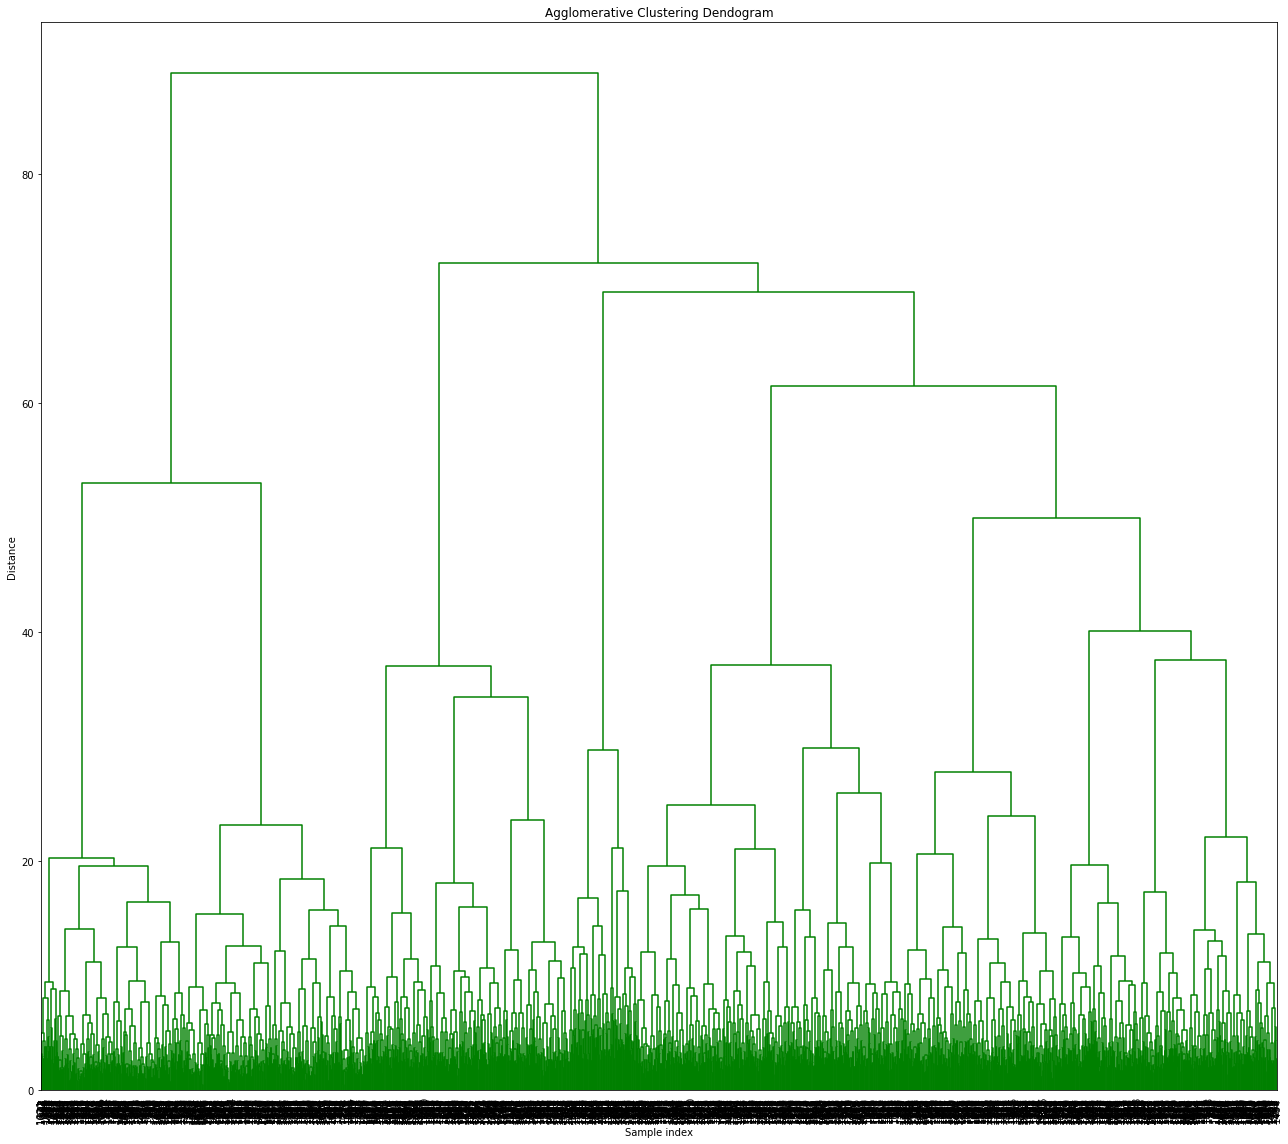

In [114]:
#HIERARCHICAL CLUSTERING
plt.figure(figsize=(18, 16))
plt.title("Agglomerative Clustering Dendogram")
plt.xlabel('Sample index')
plt.ylabel('Distance')
z = linkage(x_scaled_df, 'ward')
dendrogram(z, leaf_rotation=90.0, p = 30, color_threshold=100, leaf_font_size = 10, truncate_mode = 'level')
plt.tight_layout()

#### AGGLOMERATIVE CLUSTERING

In [115]:
#Agglomerative clustering
hie_clus = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster2 = hie_clus.fit_predict(df)
df_h = df.copy(deep=True)
df_h['label'] = cluster2
df_h['label'].value_counts()

1    1299
0     698
Name: label, dtype: int64

There are 2 clusters as a result of Agglomerative clustering

#### SILHOUTTE PLOT

For n clusters =  2 The average silhoutte score is: 0.1273042303772801


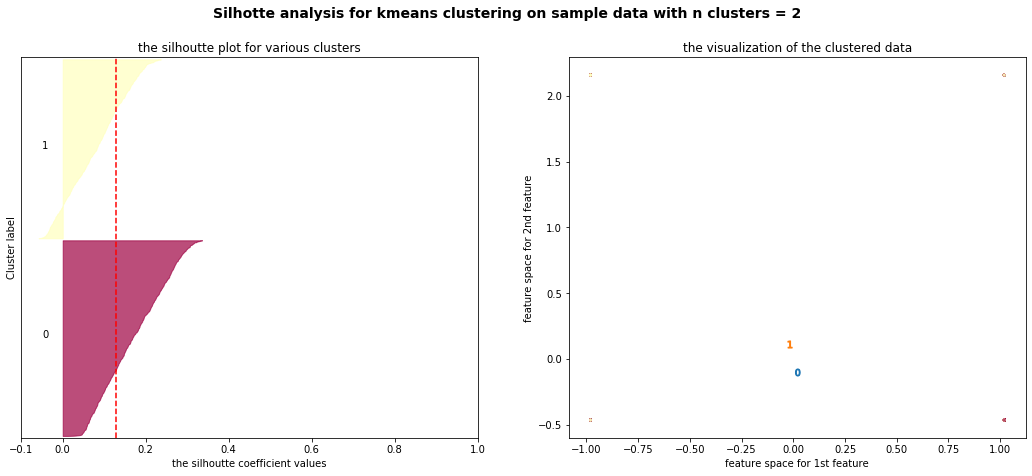

For n clusters =  3 The average silhoutte score is: 0.11622516329157748


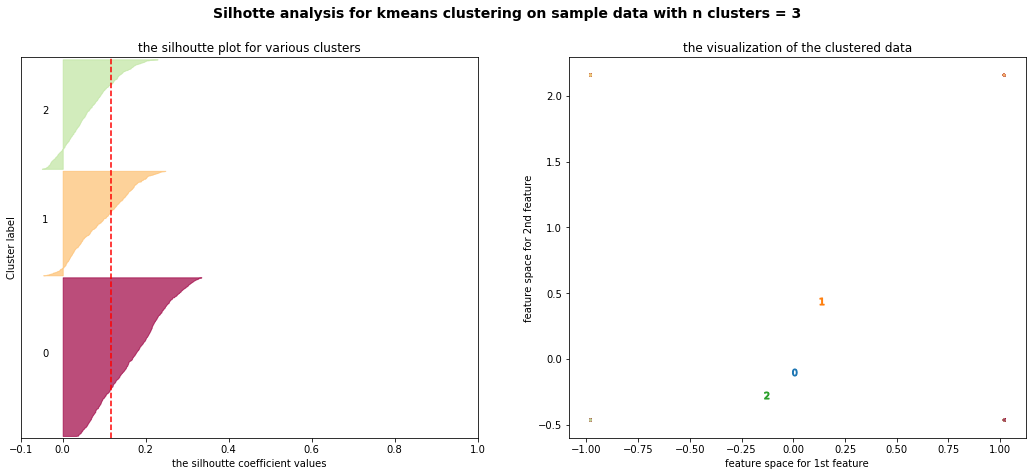

For n clusters =  4 The average silhoutte score is: 0.12437681787575176


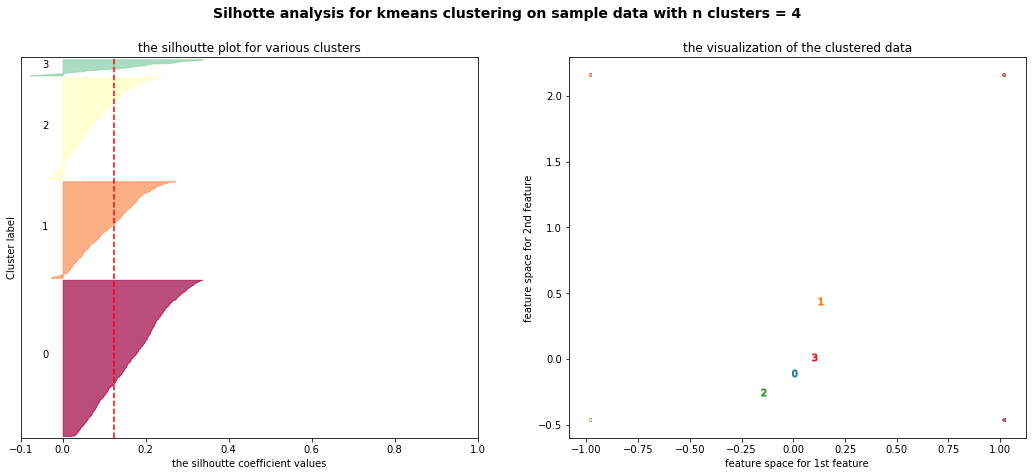

For n clusters =  5 The average silhoutte score is: 0.10656860291607731


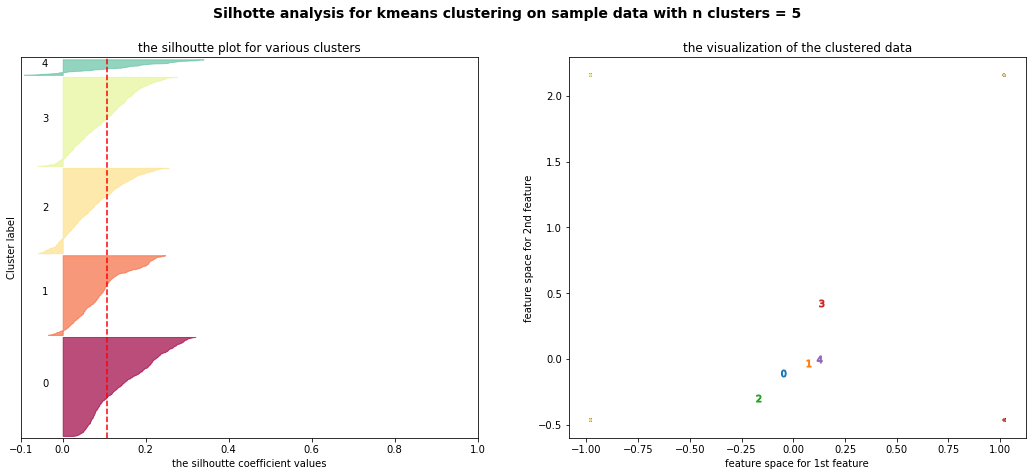

For n clusters =  6 The average silhoutte score is: 0.11024295657887379


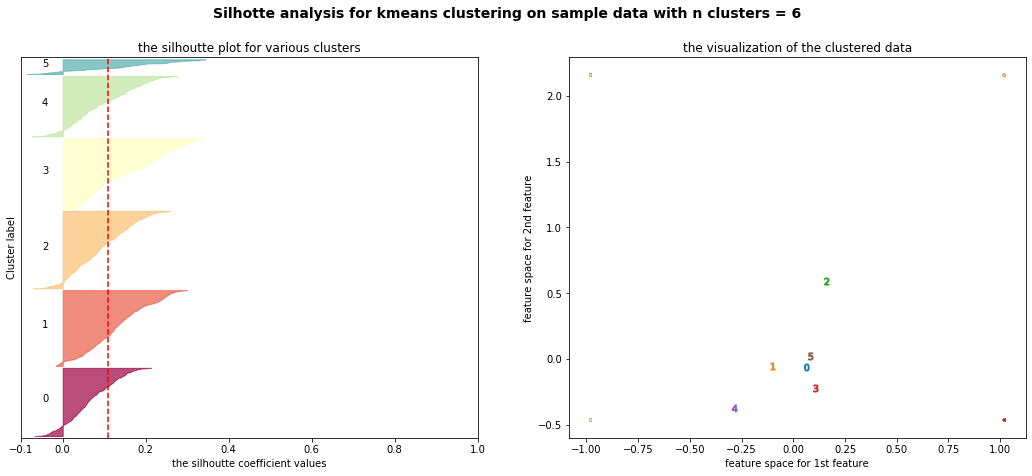

For n clusters =  7 The average silhoutte score is: 0.1180542593493664


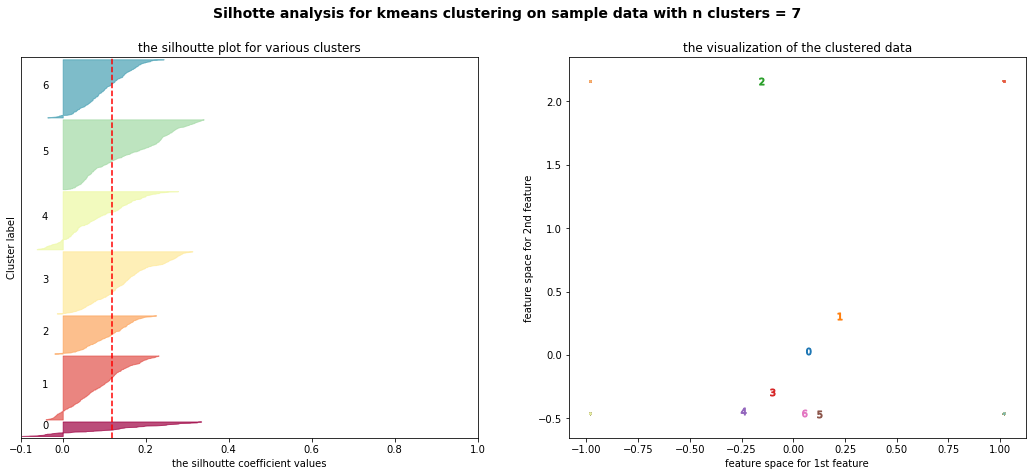

For n clusters =  8 The average silhoutte score is: 0.12012873450313037


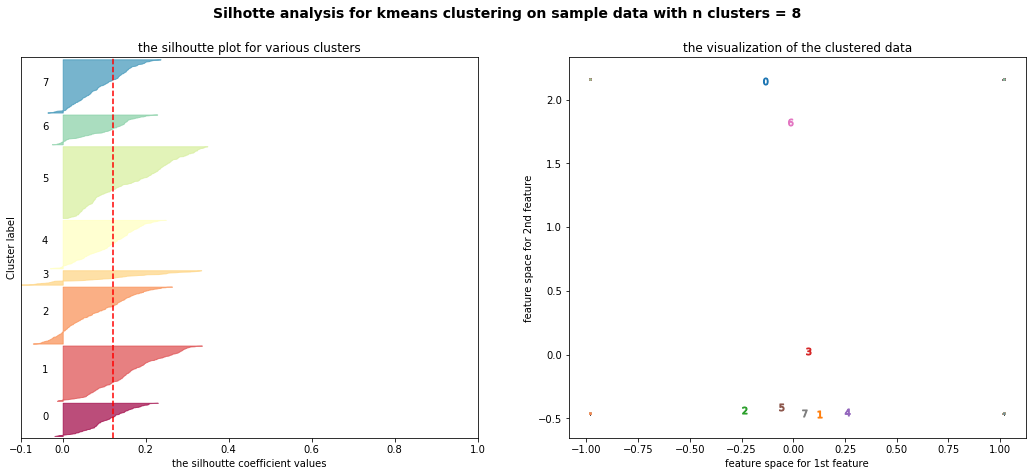

For n clusters =  9 The average silhoutte score is: 0.11552182159434742


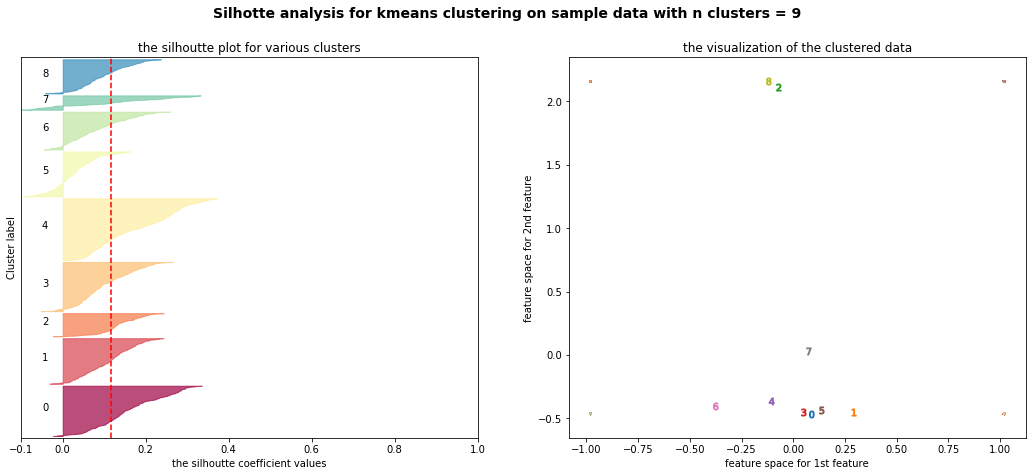

For n clusters =  10 The average silhoutte score is: 0.11856278049565376


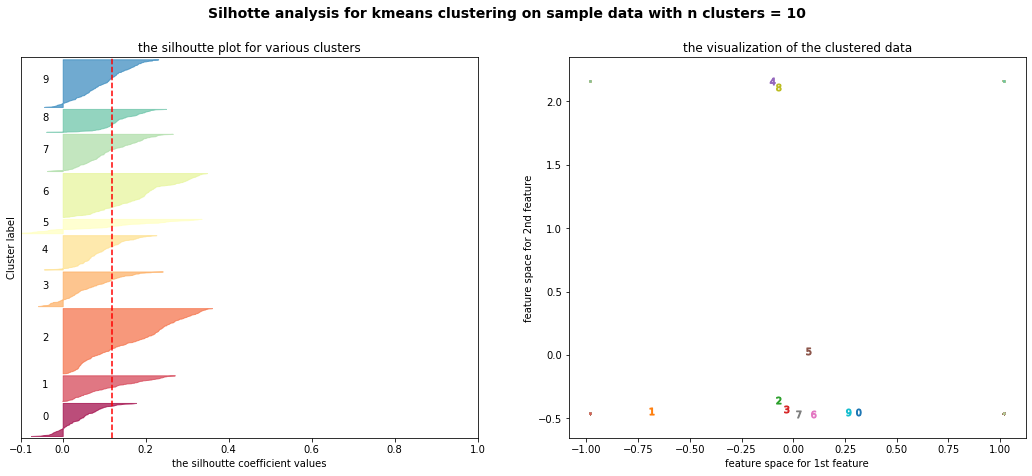

In [116]:
X = x_scaled_df.values
range_n_clusters = [2, 3, 4,5 ,6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18,7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1)*10])
    clusterer = KMeans(n_clusters=n_clusters, random_state = 19)
    cluster_labels = clusterer.fit_predict(X)
    silhoutte_avg = silhouette_score(X, cluster_labels)
    print('For n clusters = ',n_clusters, 'The average silhoutte score is:',silhoutte_avg)
    sample_silhoutte_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhoutte_values = sample_silhoutte_values[cluster_labels == i]
        ith_cluster_silhoutte_values.sort()
        size_cluster_i = ith_cluster_silhoutte_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.Spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhoutte_values, facecolor = color, edgecolor = color, alpha = 0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper +10
    ax1.set_title("the silhoutte plot for various clusters")
    ax1.set_xlabel('the silhoutte coefficient values')
    ax1.set_ylabel('Cluster label')
    ax1.axvline(x = silhoutte_avg, color = 'red', linestyle = '--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.Spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(X[:,0], X[:, 1], marker = '.', s = 30, lw = 0, alpha = 0.7, c  = colors)
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:,0], centers[:,1], marker = 'o', c = 'white', alpha = 1, s= 200)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = '$%d$' %i, alpha = 1, s = 50)
    ax2.set_title('the visualization of the clustered data')
    ax2.set_xlabel('feature space for 1st feature')
    ax2.set_ylabel('feature space for 2nd feature')
    plt.suptitle(('Silhotte analysis for kmeans clustering on sample data with n clusters = %d'%n_clusters), fontsize = 14, fontweight = 'bold')
    plt.show()

Optimum k value is 2 since the higest value for silhoutte is at 2

#### PCA WITH OPTIMAL COMPONENTS

In [117]:
#PCA with optimum number of components
model = PCA(n_components=4)
pca_val4 = model.fit_transform(x_scaled_df)


In [118]:
#Elbow plot
cluster_range = range(1, 15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5, random_state = 8)
    clusters.fit(pca_val4)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,21300.267364
1,2,15668.676031
2,3,13132.687703
3,4,11158.888415
4,5,8839.622925
5,6,8072.241920
6,7,7409.342589
7,8,6851.686887
8,9,6402.927030
9,10,6083.518219


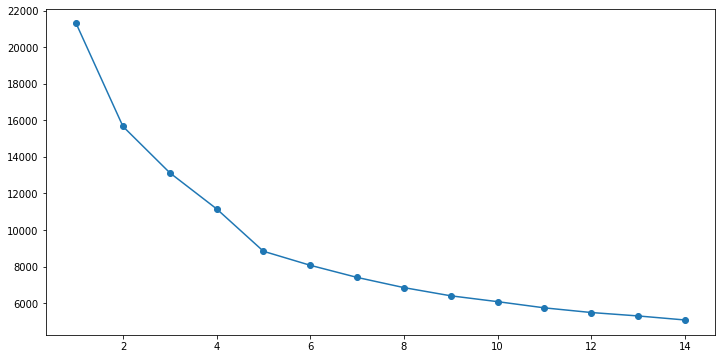

In [119]:
#Elbow plot
plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o')
plt.show()

In [120]:
#Kmeans with optimum number of clusters
kmeans = KMeans(n_clusters=2)
m_pca = kmeans.fit(pca_val4)
df_k_pca = df.copy(deep = True)
df_k_pca['label'] = clusters

In [121]:
#Comparing inertia
m1.inertia_

31991.226403269815

In [122]:
m_pca.inertia_

15668.661368147223

In [123]:
#Inertia has drastically come down and hence improving the model performance

In [124]:
df_k_pca['label'].value_counts()

KMeans(n_clusters=14, n_init=5, random_state=8)    1997
Name: label, dtype: int64

In [125]:
df_k['label'].value_counts()

0    1043
1     954
Name: label, dtype: int64

#### c.	Evaluate the clusters formed using appropriate metrics to support the model built. (4 marks)

In [126]:
#Comparison
print('Kmeans predicted Data Classes')
print(df_k.label.value_counts())
print('-'*30)
print('Hierarchical Predicted Data Classes')
print(df_h.label.value_counts())
print('-'*30)

Kmeans predicted Data Classes
0    1043
1     954
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes
1    1299
0     698
Name: label, dtype: int64
------------------------------


Model differences in comparison with the algorithms

In [127]:
#Building classification model
x = df_k.drop('label', axis = 1)
y = df_k['label']
xtrain, xvalidate, ytrain, yvalidate = train_test_split(x, y, test_size = 0.3, random_state = 7)
independent_scalar = StandardScaler()
xtrain = independent_scalar.fit_transform(xtrain)
xvalidate = independent_scalar.transform(xvalidate)


In [133]:
#Random forest
rf = RandomForestClassifier(n_estimators=300, random_state = 10, min_samples_split = 6, criterion = 'entropy', max_depth = 5)
rf.fit(xtrain, ytrain)
predictvalues_train = rf.predict(xtrain)
accuracy_train = accuracy_score(ytrain, predictvalues_train)
predictvalues_validate = rf.predict(xvalidate)
accuracy_validate = accuracy_score(yvalidate, predictvalues_validate)
print('Train accuracy:', accuracy_train)
print('Validation accuracy:', accuracy_validate)

Train accuracy: 0.9441660701503222
Validation accuracy: 0.91


### BUSINESS INTERPRETATION

The two groups of customers are<br>
1. Neutral or Dissatisfied<br>
2. Satisfied

There are optimally three classes of ratings that can be provided for the satisfaction of the customer. Variables like Distance, seat comfort are the modet affecting variables. The performance of the imroved model with pca has improved compared to the base model since the inertia value came down. That proves that the efficiency of the mdodel is much higher.

From a business point of view, it is easy to know the needs of each group of customer after clustering rather than as a whole. Improvements can be done based on the customer feedback and discounts can be offered to targeted customers. This way we can increase the profit of the organization and gain many new customers apart from keeping the loyal customers.